# I. Data Cleaning and EDA

In [52]:
import pandas as pd

url = 'https://data.cityofnewyork.us/api/views/833y-fsy8/rows.csv?accessType=DOWNLOAD'
data = pd.read_csv(url)
data.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [53]:
missing_values = data.isnull().sum()
data_types = data.dtypes

# convert occur_date and occur_time into a single column and drop original cols
data['DATETIME'] = pd.to_datetime(data['OCCUR_DATE'] + ' ' + data['OCCUR_TIME'])
data.drop(columns = ['OCCUR_TIME', 'OCCUR_DATE'], inplace = True)

missing_values, data_types

(INCIDENT_KEY                   0
 OCCUR_DATE                     0
 OCCUR_TIME                     0
 BORO                           0
 LOC_OF_OCCUR_DESC          25596
 PRECINCT                       0
 JURISDICTION_CODE              2
 LOC_CLASSFCTN_DESC         25596
 LOCATION_DESC              14977
 STATISTICAL_MURDER_FLAG        0
 PERP_AGE_GROUP              9344
 PERP_SEX                    9310
 PERP_RACE                   9310
 VIC_AGE_GROUP                  0
 VIC_SEX                        0
 VIC_RACE                       0
 X_COORD_CD                     0
 Y_COORD_CD                     0
 Latitude                      10
 Longitude                     10
 Lon_Lat                       10
 dtype: int64,
 INCIDENT_KEY                 int64
 OCCUR_DATE                  object
 OCCUR_TIME                  object
 BORO                        object
 LOC_OF_OCCUR_DESC           object
 PRECINCT                     int64
 JURISDICTION_CODE          float64
 LOC_CLASSFCTN_DESC

We see that we have the following columns with missing values. As the attributes with missing values are categorical, we can replace missing values with 'Unknown' to retain the rest of the data in the observations.

LOC_OF_OCCUR_DESC: 25,596 missing values. <br>
JURISDICTION_CODE: 2 missing values. <br>
LOC_CLASSFCTN_DESC: 25,596 missing values. <br>
LOCATION_DESC: 14,977 missing values. <br>
PERP_AGE_GROUP: 9,344 missing values. <br>
PERP_SEX: 9,310 missing values. <br>
PERP_RACE: 9,310 missing values. <br>
Latitude, Longitude, Lon_Lat: 10 missing values each. <br>



In [57]:
columns_to_add_unknown = ['LOC_OF_OCCUR_DESC', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC',
                          'LOCATION_DESC', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 
                          'Latitude', 'Longitude', 'Lon_Lat']

# add unknown in place of NA in each column
for col in columns_to_add_unknown:
    data[col].fillna('UNKNOWN', inplace = True)

# Make sure all missing values are gone
still_missing = data.isnull().sum()
still_missing

# Check unique values in each column
unique_values = {column: data[column].unique() for column in data.columns}

# replace values in various attributes w/ 'unknown'
data['PERP_AGE_GROUP'].replace(['940', '224', '1020', 'Unknown', '(null)'], 'UNKNOWN', inplace = True)
data['PERP_AGE_GROUP'].replace(['<NA>'], 'UNKNOWN', inplace = True)
data['PERP_SEX'].replace(['(null)', 'U', 'Unknown'], 'UNKNOWN', inplace = True)
data['VIC_AGE_GROUP'].replace(['1020', '1022'], 'UNKNOWN', inplace = True)
data['PERP_RACE'].replace(['(null)', 'Unknown'], 'UNKNOWN', inplace = True)
data['VIC_RACE'].replace(['(null)'], 'UNKNOWN', inplace = True)

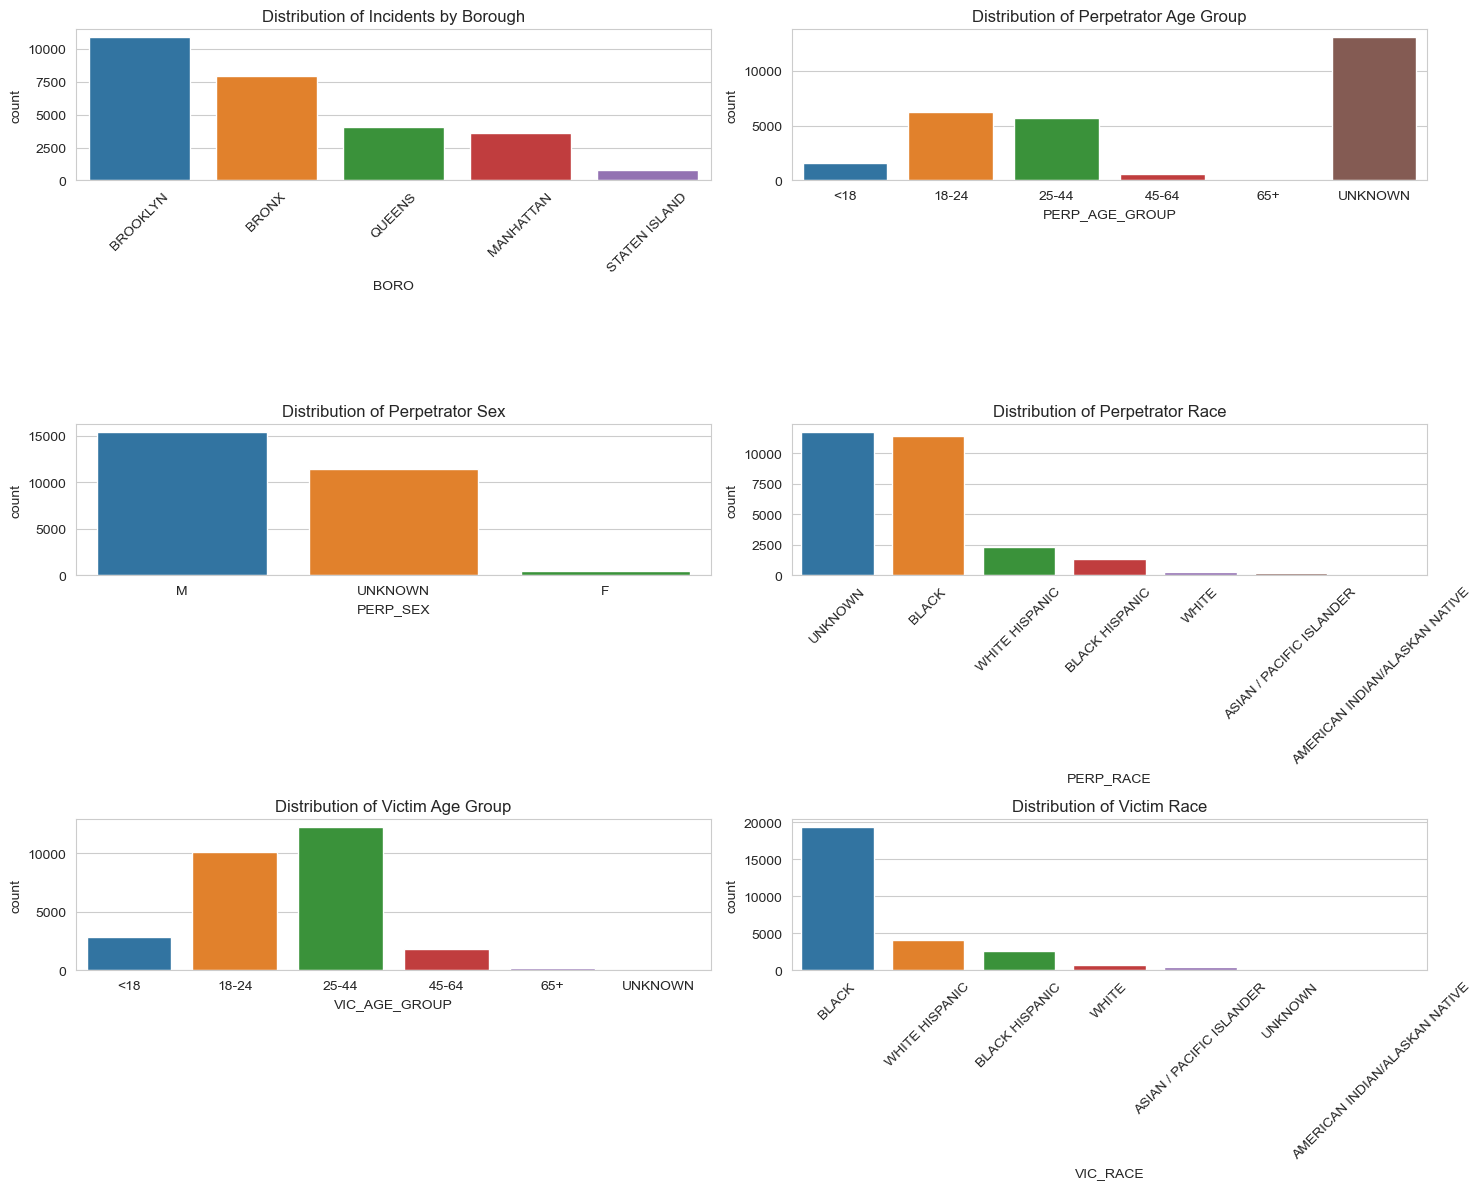

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

age_order = ['<18', '18-24', '25-44', '45-64', '65+', 'UNKNOWN']
boro_order = data['BORO'].value_counts(dropna=True).index
perp_sex_order = data['PERP_SEX'].value_counts(dropna=True).index
perp_race_order = data['PERP_RACE'].value_counts(dropna=True).index
vic_race_order = data['VIC_RACE'].value_counts(dropna=True).index

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15,12))

sns.countplot(data=data, x='BORO', ax=axes[0, 0], order=boro_order)
axes[0, 0].set_title('Distribution of Incidents by Borough')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(data=data, x='PERP_AGE_GROUP', ax=axes[0, 1], order=age_order)
axes[0, 1].set_title('Distribution of Perpetrator Age Group')

sns.countplot(data=data, x='PERP_SEX', ax=axes[1, 0], order=perp_sex_order)
axes[1, 0].set_title('Distribution of Perpetrator Sex')

sns.countplot(data=data, x='PERP_RACE', ax=axes[1, 1], order=perp_race_order)
axes[1, 1].set_title('Distribution of Perpetrator Race')
axes[1, 1].tick_params(axis='x', rotation=45)

sns.countplot(data=data, x='VIC_AGE_GROUP', ax=axes[2, 0], order=age_order)
axes[2, 0].set_title('Distribution of Victim Age Group')

sns.countplot(data=data, x='VIC_RACE', ax=axes[2, 1], order=vic_race_order)
axes[2, 1].set_title('Distribution of Victim Race')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

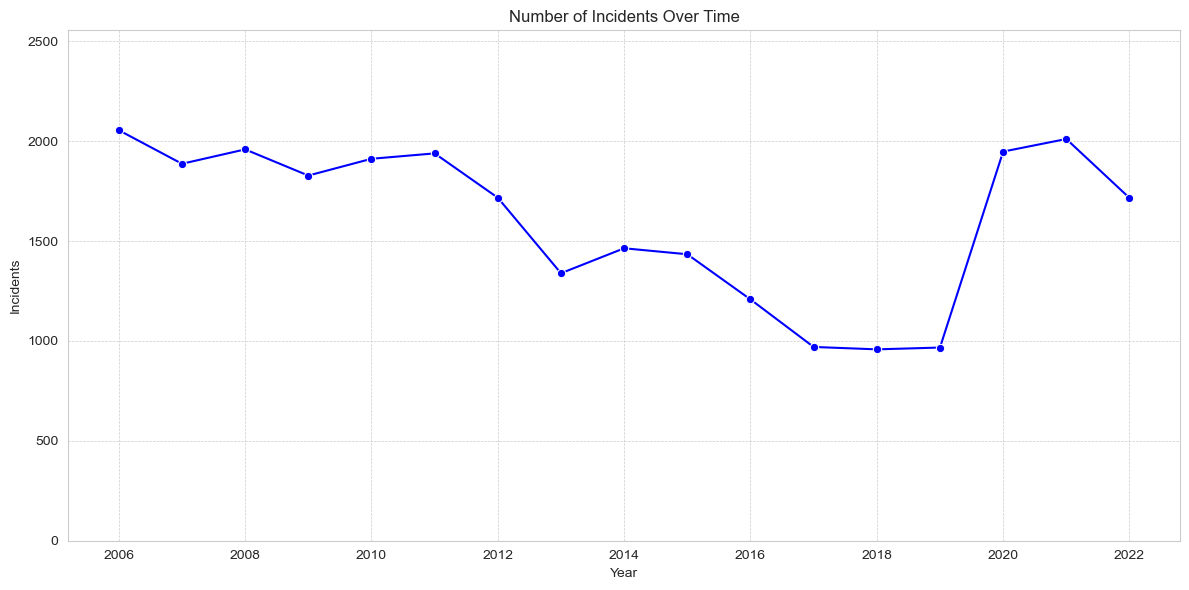

In [61]:
# plot the number of incidents over time
data['YEAR'] = data['DATETIME'].dt.year
annual_counts = data.groupby('YEAR').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=annual_counts.index, y=annual_counts.values, marker='o', color='blue')
plt.title('Number of Incidents Over Time')
plt.ylabel('Incidents')
plt.xlabel('Year')
plt.ylim(0, max(annual_counts.values) + 500)  # Adjust y-axis limit
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

From the figure above, we can see a steady decline in annual incident counts initially with the highest rates of decreases in the period from 2011-2013 and a noticeable continuation of this decline through 2019. However, there was a sharp increase in incidents in 2020. It appears that the frequency of incidents has begun to level off again into 2022, but more data is needed to conclusively argue that the prior trend will continue.

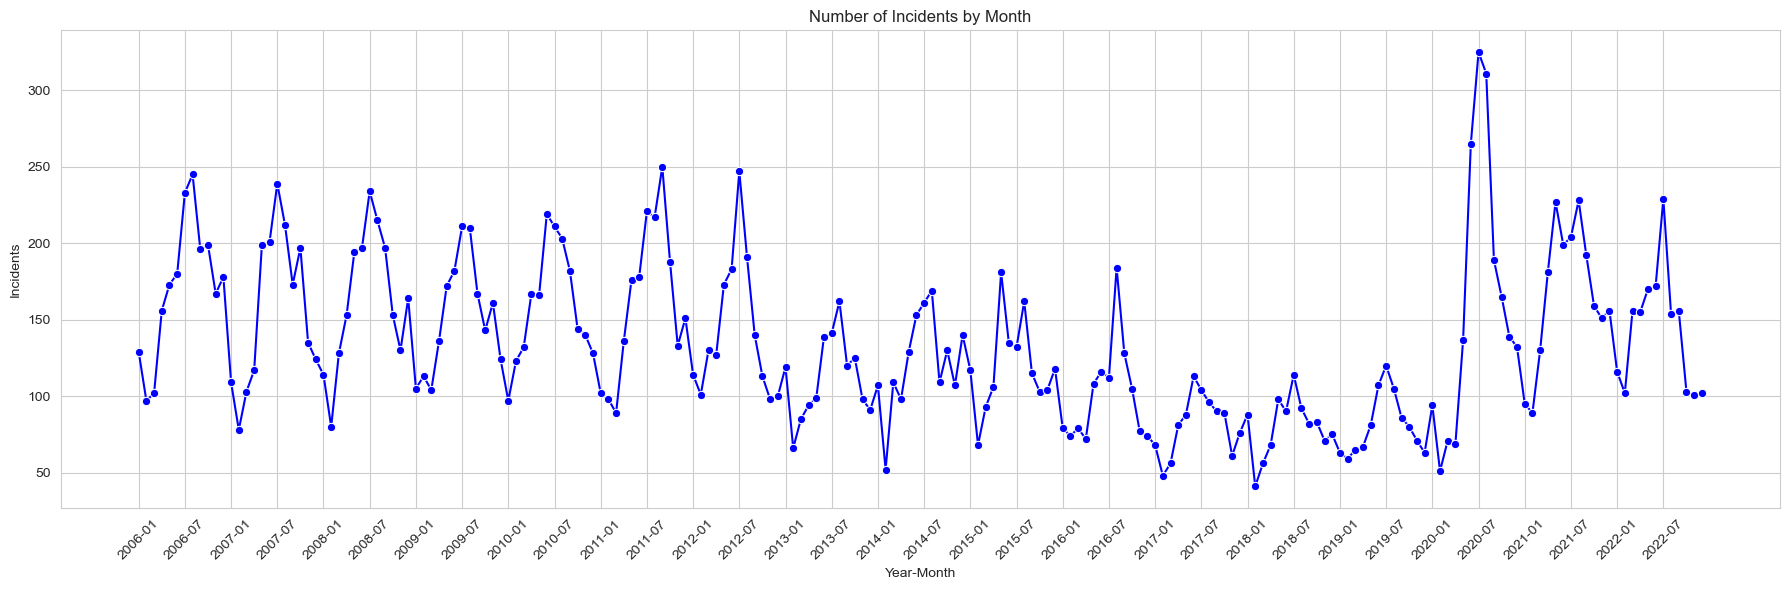

In [64]:
data['YearMonth'] = data['DATETIME'].dt.to_period('M')
monthly_counts = data.groupby('YearMonth').size()

# only show every 6th month so labels fit
ticks = range(0, len(monthly_counts), 6)
tick_labels = monthly_counts.index.astype(str)[::6]

plt.figure(figsize=(18, 6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o', color='blue')
plt.title('Number of Incidents by Month')
plt.ylabel('Incidents')
plt.xlabel('Year-Month')
plt.xticks(ticks, tick_labels, rotation=45)
plt.tight_layout()
plt.show()

Breaking the data down by months allows us to discern some very clear seasonal patterns in the frequency of incidents. It appears that incidents peak in the summer months around July/August and hit their lowest frequencies around the holiday season in December and January.

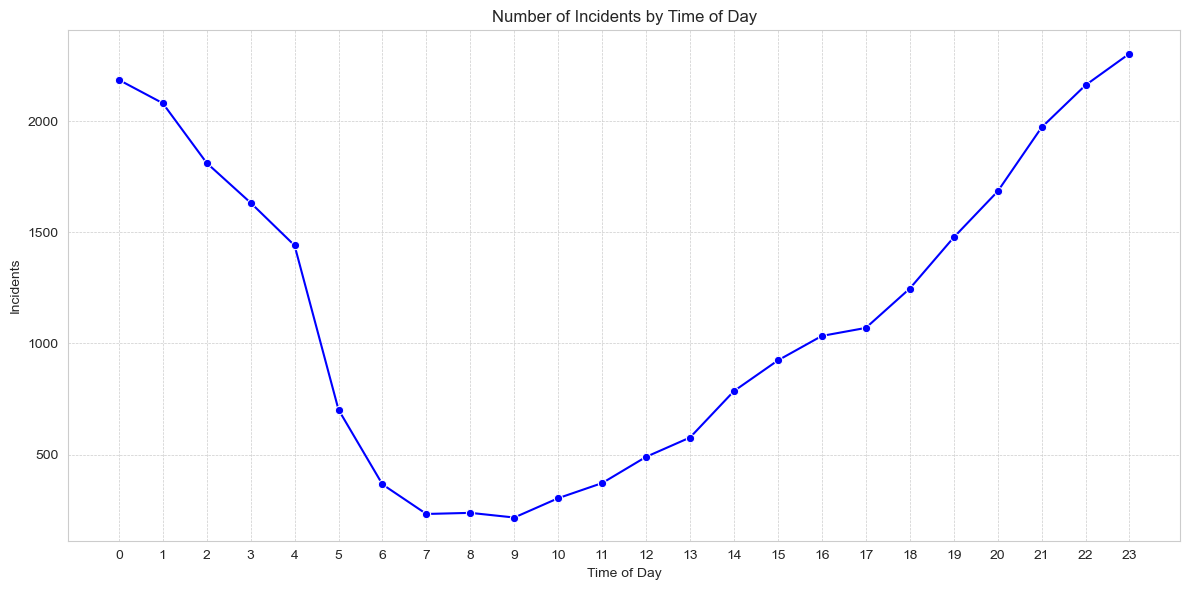

In [69]:
# plot incident counts by hour of the day in which they occur
data['Hour'] = data['DATETIME'].dt.hour
hourly_counts = data.groupby('Hour').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color='blue')
plt.title('Number of Incidents by Time of Day')
plt.ylabel('Incidents')
plt.xlabel('Time of Day')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(hourly_counts.index)  # Ensure all hours are displayed on the x-axis
plt.tight_layout()
plt.show()

Inspecting the frequency of incidents by time of day can prove useful as it can provide insight into how best to allocate resources (first responders on duty) throughout the day. We can break the day down into three categories:

Nighttime to Early Morning: There is a large spike in incidents from 9 PM to 4 AM with peak hours of 10 PM to 2 AM. <br>

Work-Hours Lull: Incidents reach their lowest counts from 7 AM - 5 PM. <br>

Ramp-Up Period: Incident frequency appears to increase much more quickly from 6 PM - 9 PM.

# II. Utilizing SARIMA Model to Predict Future Incident Frequencies

Since seasonality is present in the data we cannot use ARIMA for prediction, however, SARIMA is a modified algorithm which applies a seasonality component which allows us to model the seasonality, making it more suited to this particular dataset.

To implement our SARIMA model we must first validate the stationary data assumption. The techniques used to validate the assumption and implement the model are as follows:

1. Stationary Data: To make the data stationary, we may need to apply differencing. This involves subtracting the current value from the previous, which can help to eliminate trends or seasonality that may violate this assumption. <br>
2. Parameter Selection: The SARIMA model has several parameters (p, d, q, P, D, Q, s). We'll determine the combination of these parameters that yields the model with the lowest AIC  for our data. <br>
3. Model Training: We'll fit the SARIMA model using the selected parameters on the subset of our data selected for training. <br>
4. Model Validation: We'll validate the model's accuracy on the subset of our data selected for validation (test set). <br>
5. Prediction: We'll predict the incident frequency for 2023.

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
import numpy as np

# Split data into training and test sets
monthly_incidents = data.groupby('YearMonth').size()
train = monthly_incidents.loc[:'2021-12']
validation = monthly_incidents.loc['2022':]

# Define the parameters p, d, q, s
p = d = q = range(0, 2)
pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p, d, q))]
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]  # Use a seasonality parameter of 12 months

# Grid search to find the set of parameters that yields the lowest AIC
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
best_model = None


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            temp_model = SARIMAX(train,
                                 order=param,
                                 seasonal_order=param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            temp_results = temp_model.fit()
            if temp_results.aic < best_aic:
                best_aic = temp_results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_model = temp_results
        except:
            continue

print(f'The AIC for the train model is: {best_aic}')
print(f'The optimal p,d,q parameters are: {best_pdq}')
print(f'The optimal P,D,Q,S parameters are: {best_seasonal_pdq}')

The AIC for the train model is: 1555.5494537099569
The optimal p,d,q parameters are: (1, 1, 1)
The optimal P,D,Q,S parameters are: (0, 1, 1, 12)


From the results above, our parameters are as follows:
p = 1 (AR - Autoregression): The model uses the value from the prior step to predict the next value. <br>
d = 1 (I - Integrated): The observations are differenced 1 time to make it stationary. <br>
q = 1 (MA - Moving Average): The moving average 'window' is limited to the prior observation. <br>

The P, D, Q are similar in interpretation to the non-seasonality adjusted model parameters, but are interpreted as being 'batched' for each 12-month period (which is what we are using as our 's' parameter to separate out the seasonal periods. The only difference here is that P = 0 implies that the seasonal component of the time series does not require an autoregressive component (i.e. it does not use the value from the prior 12 months in its prediction for the current month).

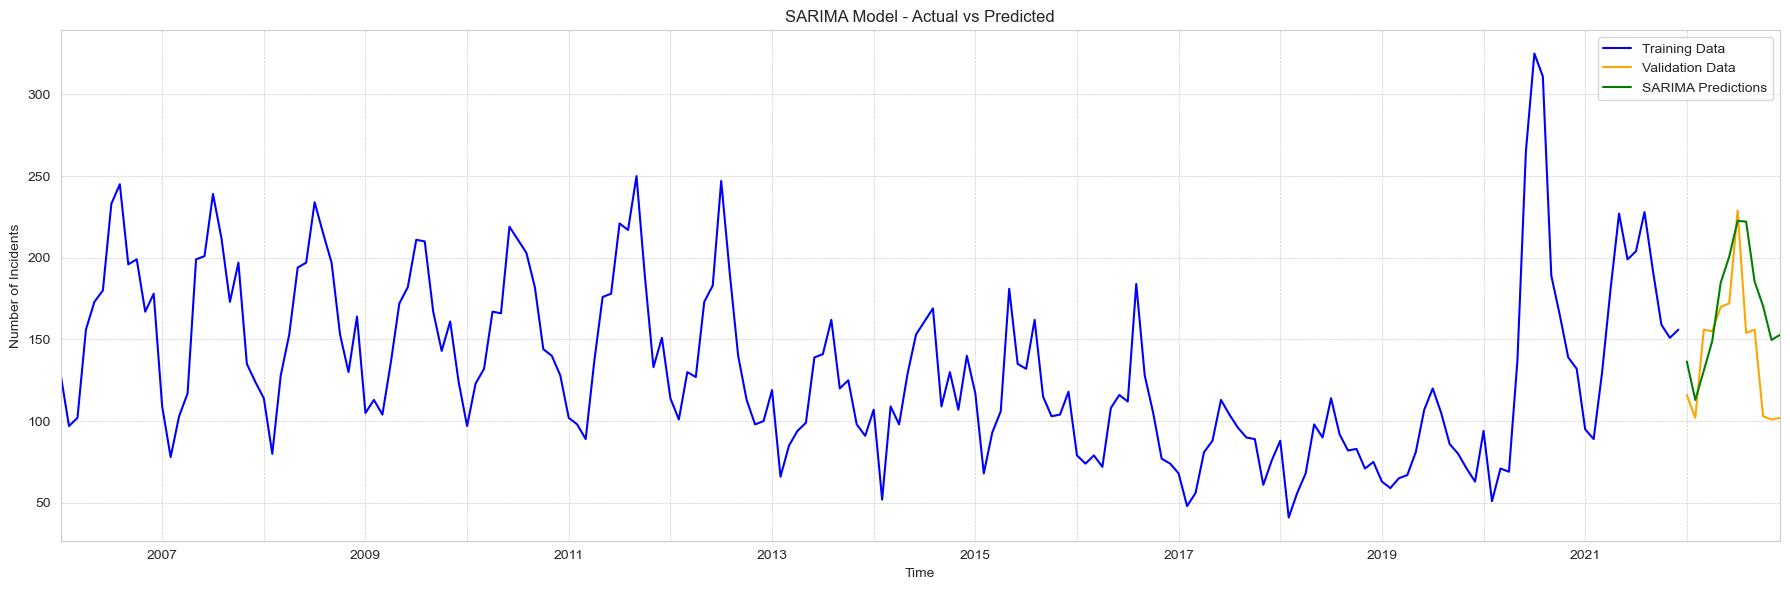

In [81]:
# Fit model using selected parameters
sarima_model = SARIMAX(train,
                       order=best_pdq,
                       seasonal_order=best_seasonal_pdq,
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_results = sarima_model.fit()

# Predict values for test set
start = len(train)
end = start + len(validation) - 1
predictions = sarima_results.predict(start=start, end=end, dynamic=False)

# Plot actual vs predicted values
plt.figure(figsize=(18, 6))
train.plot(label='Training Data', color='blue')
validation.plot(label='Validation Data', color='orange')
predictions.plot(label='SARIMA Predictions', color='green')
plt.title('SARIMA Model - Actual vs Predicted')
plt.ylabel('Number of Incidents')
plt.xlabel('Time')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

From the plot above, we can see that the model performs reasonably well in its attempt to capture the trend and seasonality in the testing set. We will take a look at the residuals, and then we will compute the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) to delve a bit deeper into the model's performance.

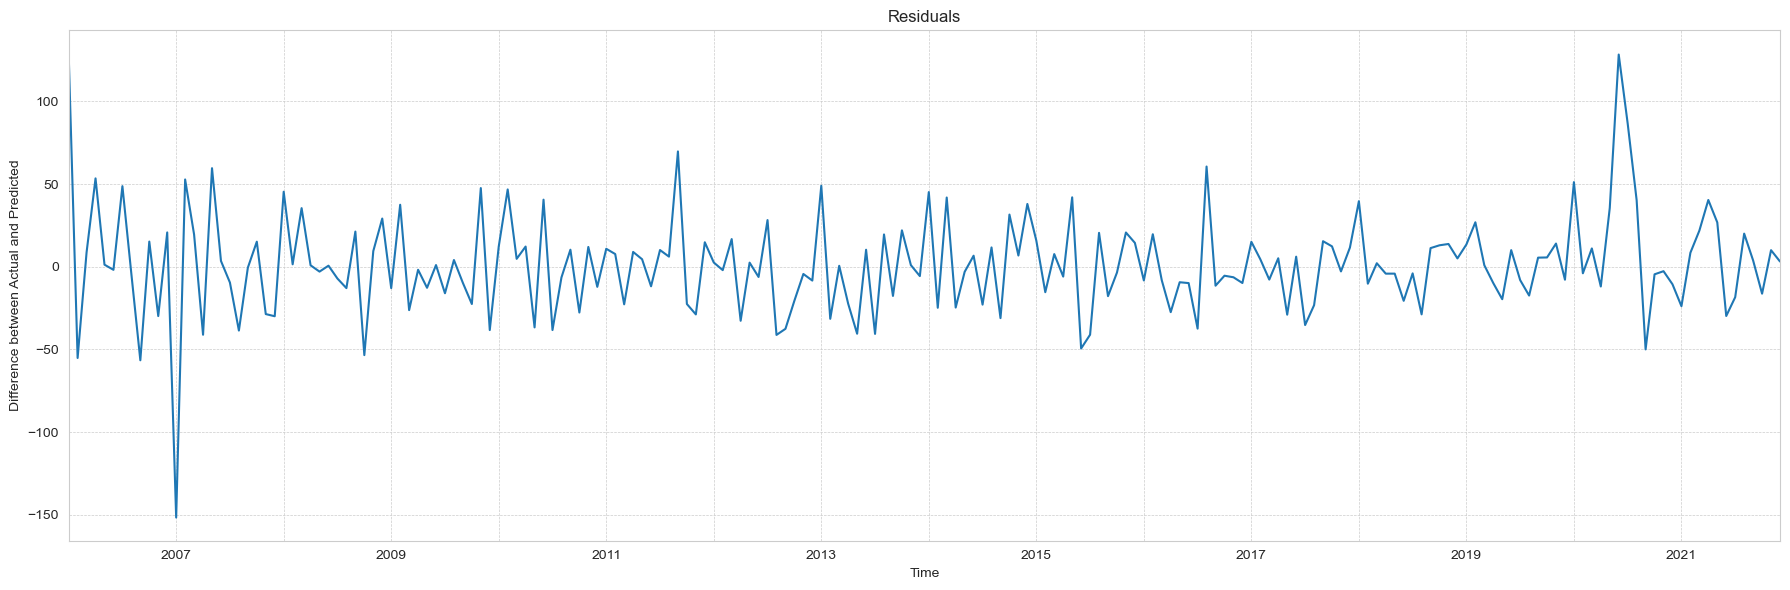

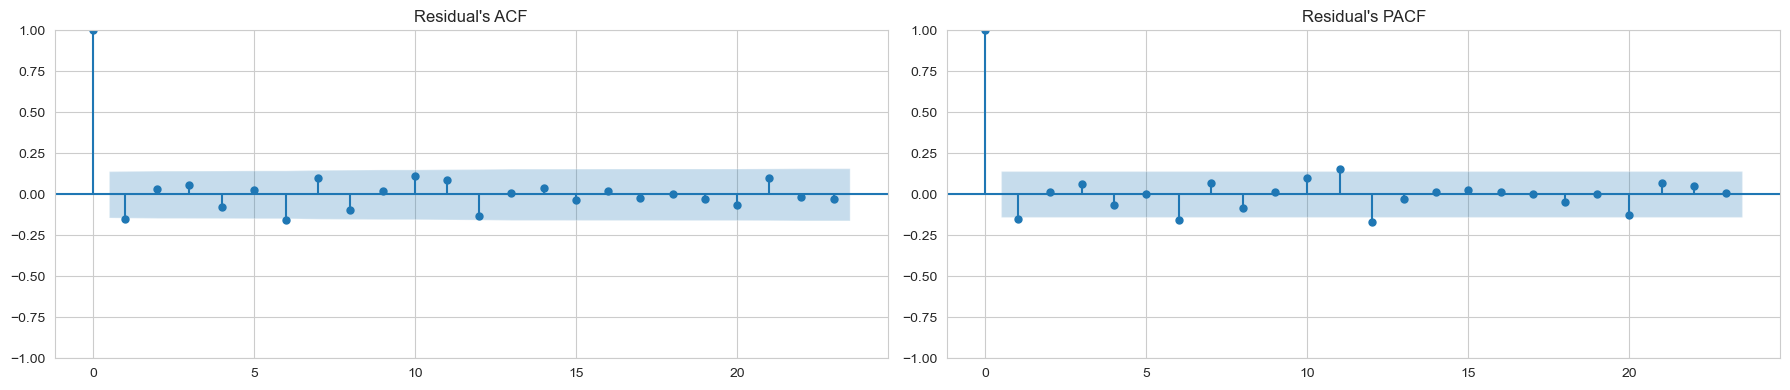

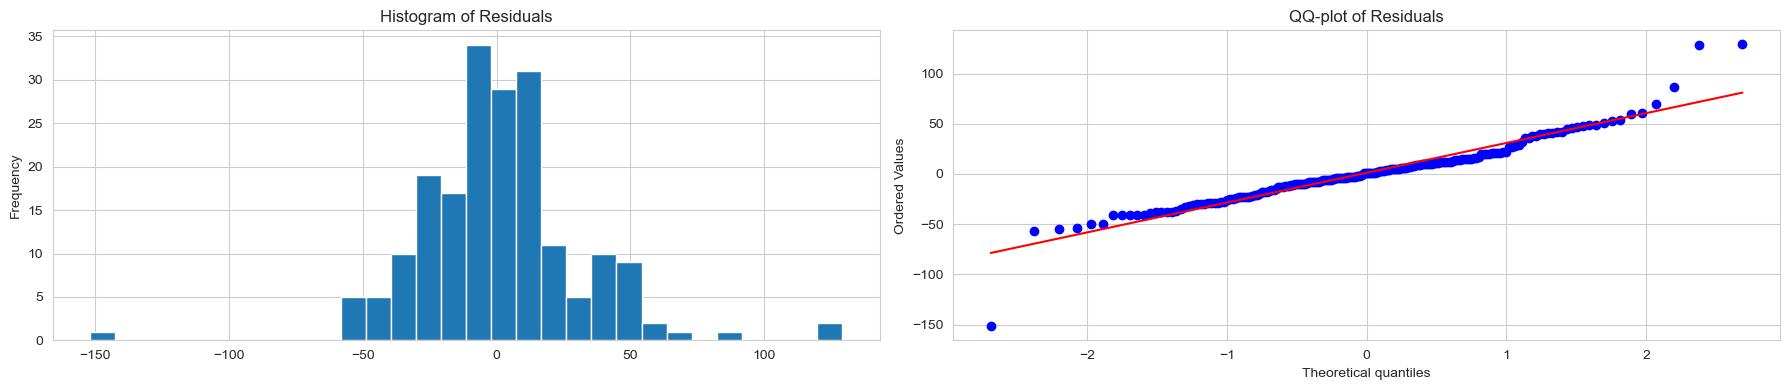

In [88]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import probplot
# Calculate and plot residuals
residuals = train - sarima_results.fittedvalues

plt.figure(figsize=(18,6))
residuals.plot(title='Residuals')
plt.ylabel('Difference between Actual and Predicted')
plt.xlabel('Time')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot ACF and PACF of residuals
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
plot_acf(residuals, ax=ax[0], title="Residual's ACF")
plot_pacf(residuals, ax=ax[1], title="Residual's PACF")
plt.tight_layout()
plt.show()

# Plot histogram and QQ-plot for residuals
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
residuals.plot(kind='hist', ax=ax[0], bins=30, title='Histogram of Residuals')
probplot(residuals, plot=ax[1])  # QQ-plot
ax[1].set_title('QQ-plot of Residuals')
plt.tight_layout()
plt.show()

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(validation, predictions).round(3)
rmse = mean_squared_error(validation, predictions, squared=False).round(3)

print(f'The MAE is: {mae} and the RMSE is: {rmse}')

The MAE is: 31.411 and the RMSE is: 37.973


<b>General Assumptions:</b> <br>
-The residuals oscillate around the zero line, suggesting that there isn't a systematic bias in our predictions. There's no visible upward or downward trend in the residuals, indicating the model has accounted for the overall trend in the data. <br>
-The spread of residuals seems consistent across the timeline. There isn't an apparent shape or any funneling, increasing/decreasing spread--which suggests this assumption has not been violated. <br>
-The autocorrelation plot shows some spikes, especially at the 12-month mark, which indicates some residual seasonality. The presence of significant autocorrelations in the residuals suggests that the model might not have captured all the available temporal structure in the series. <br>

<b>Normality Assumptions:</b> <br>
-Histogram: The histogram suggests that the residuals are somewhat normally distributed, but with a slight positive skewness. <br>
-QQ-Plot: The QQ-plot shows that the residuals largely follow the 45-degree reference line, indicating normality. However, there are some deviations at the tail ends, suggesting the presence of some outliers or a slight deviation from a perfect normal distribution. <br>
-Randomness: The residuals look mostly random, although the ACF does show some patterns. <br>
-The time series plot of the residuals does not show an evident seasonal pattern, which is a good sign. However, as mentioned, the ACF plot does show some spikes at the 12-month intervals, which may hint at some residual seasonality. <br>

# III. Conclusion

The model appears to be a fairly good fit for the data. Considering that the frequency of incidents ranges from 50 to 250 on average, the MAE and RMSE of 31.411 and 37.973 are decent. The residuals are close to zero on average and do not show signs of violating the assumption of homoscedasticity. The histogram and QQ-plot also show strong signs of normality. However, the ACF suggests that there might be some remaining seasonality or other temporal structures that the model hasn't entirely captured. This could be addressed by further tweaking the SARIMA parameters or considering/engineering additional features.